In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
#fondo_a = pd.read_csv("/content/drive/My Drive/Crisis_BG_Fondo_A_agrupado.csv")['Fondo Tipo A']
#fondo_a = pd.read_csv("/content/drive/My Drive/Simulacion_intermedia_BG_Fondo_A_agrupado.csv")['Fondo Tipo A']
fondo_a = pd.read_csv("/content/drive/My Drive/Forecast_Fondo_A_LSTM_agrupado_nuevo.csv")['Fondo Tipo A']
#fondo_a = pd.read_csv("/content/drive/My Drive/Forecast_Fondo_A_LSTM_agrupado.csv")['Fondo Tipo A']
#fondo_e = pd.read_csv("/content/drive/My Drive/Forecast_Fondo_E_RandomForest_agrupado.csv")['Fondo Tipo E']
#fondo_e= pd.read_csv("/content/drive/My Drive/Crisis_BG_Fondo_E_agrupado.csv")['Fondo Tipo E']
#fondo_e= pd.read_csv("/content/drive/My Drive/Simulacion_intermedia_BG_Fondo_E_agrupado.csv")['Fondo Tipo E']
fondo_e = pd.read_csv("/content/drive/My Drive/Forecast_Fondo_E_RandomForest_agrupado_nuevo.csv")['Fondo Tipo E']
periodos=40
fondo_a_historico=pd.read_csv("/content/drive/My Drive/Agrupacion_historica_Fondo_A.csv")[['Fondo Tipo A']]
fondo_e_historico=pd.read_csv("/content/drive/My Drive/Agrupacion_historica_Fondo_E.csv")[['Fondo Tipo E']]
#fondo_e.loc[:periodos]=0
#fondo_a.loc[periodos/2:]=0.055
covarianza = np.cov(np.stack((fondo_a.loc[:periodos].dropna().values,fondo_e.loc[:periodos].dropna().values),axis=0))
fondo_a_mean = float(fondo_a.loc[:periodos].mean())
fondo_e_mean = float(fondo_e.loc[:periodos].mean())
theta = 1
alpha = 1
beta = 0.95
lambda_= fondo_a.values
mu_= fondo_e.values
c = 0.1

In [ ]:
fondo_a_new=pd.DataFrame(fondo_a,columns=['Fondo Tipo A'])
fondo_e_new=pd.DataFrame(fondo_e,columns=['Fondo Tipo E'])
fondo_a_historico=pd.concat([fondo_a_historico,fondo_a_new],axis=0)
fondo_e_historico=pd.concat([fondo_e_historico,fondo_e_new],axis=0)

In [ ]:
fondo_a_historico=fondo_a_historico.reset_index().drop(columns=['index'])
fondo_e_historico=fondo_e_historico.reset_index().drop(columns=['index'])

In [ ]:
fondo_a=fondo_a_historico['Fondo Tipo A']
fondo_e=fondo_e_historico['Fondo Tipo E']

In [ ]:
offset=19

In [ ]:
lambda_= fondo_a.loc[offset:].values
mu_= fondo_e.loc[offset:].values

In [ ]:
fondo_a_mean = float(fondo_a.loc[offset:].mean())
fondo_e_mean = float(fondo_e.loc[offset:].mean())

In [ ]:
covarianza = np.cov(np.stack((fondo_a.dropna().values,fondo_e.dropna().values),axis=0))

In [ ]:
fondo_a_mean

0.048563475166652034

In [ ]:
fondo_e_mean

0.04340915446813208

In [ ]:
covarianza[0][0]

0.006212921733777652

In [ ]:
covarianza[1][1]

0.000814486318886941

In [ ]:
covarianza[1][0]

-2.8817201853123777e-05

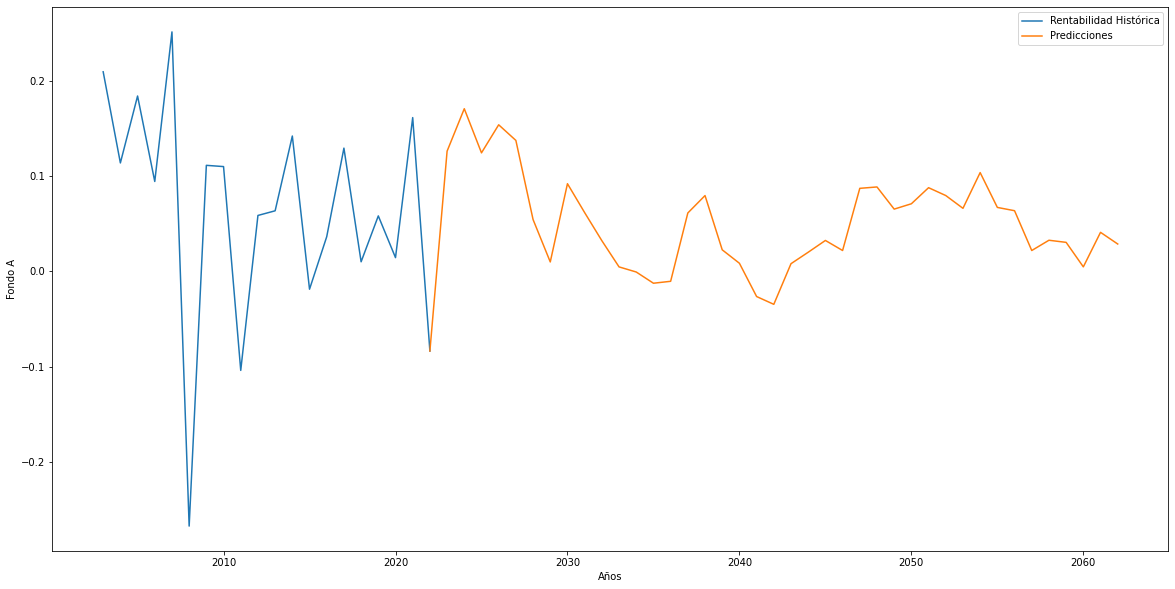

In [ ]:
plt.figure(figsize=(20,10))
plt.plot([2002+i for i in range(1,offset+2)],fondo_a.loc[:offset],label='Rentabilidad Histórica')
plt.plot([2022+i for i in range(41)],fondo_a.loc[offset:],label='Predicciones')
plt.legend()
plt.ylabel("Fondo A")
plt.xlabel("Años")
plt.show()

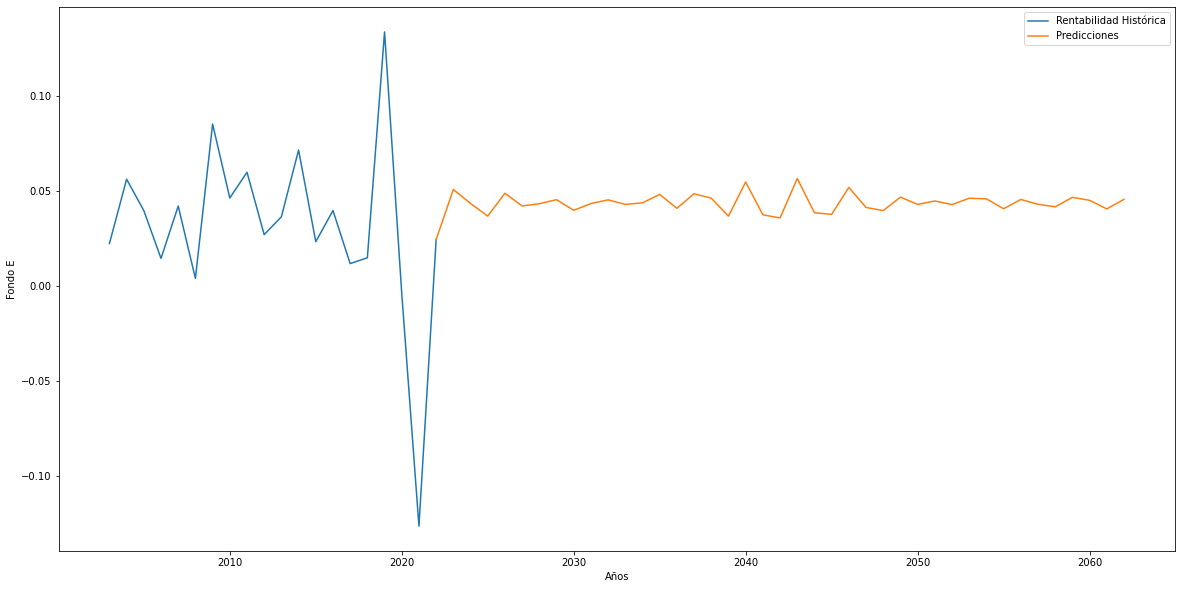

In [ ]:
plt.figure(figsize=(20,10))
plt.plot([2002+i for i in range(1,offset+2)],fondo_e.loc[:offset],label='Rentabilidad Histórica')
plt.plot([2022+i for i in range(41)],fondo_e.loc[offset:],label='Predicciones')
plt.legend()
plt.ylabel("Fondo E")
plt.xlabel("Años")
plt.show()

Tenemos que los momentos de una variable aleatoria log-normal son
$$\mathbb{E}[X^k]=e^{k(\mu+k\frac{\sigma^2}{2})}$$

También el valor esperado del producto de 2 variables aleatorias lognormales es
$$\mathbb{E}[X_1X_2]=e^{(\mu_1+\mu_2)+\frac{\sigma_1^2+\sigma_2^2+2\rho\sigma_1\sigma_2}{2}}$$

In [ ]:
esperanza_log_normal_W_1 = np.exp(fondo_a_mean+(1/2)*covarianza[0][0])
esperanza_log_normal_W_2 = np.exp(fondo_e_mean+(1/2)*covarianza[1][1])

esperanza_log_normal_W_12 = np.exp(2*(fondo_a_mean+covarianza[0][0]))
esperanza_log_normal_W_22 = np.exp(2*(fondo_e_mean+covarianza[1][1]))

esperanza_W_1W_2 = np.exp((fondo_a_mean+fondo_e_mean)+(1/2)*(covarianza[0][0]+covarianza[1][1]+2*covarianza[1][0]*np.sqrt(covarianza[1][1])*np.sqrt(covarianza[0][0])))

esperanza_W_1_W_2_2=esperanza_log_normal_W_12-2*esperanza_W_1W_2+esperanza_log_normal_W_22

Lambda=(esperanza_log_normal_W_12*esperanza_log_normal_W_22-(esperanza_W_1W_2)**2)/(esperanza_W_1_W_2_2)

In [ ]:
Lambda

1.0849078419489726

In [ ]:
Gamma=(esperanza_log_normal_W_12*esperanza_log_normal_W_2+esperanza_log_normal_W_1*esperanza_log_normal_W_22-esperanza_W_1W_2*(esperanza_log_normal_W_1+esperanza_log_normal_W_2))/(esperanza_W_1_W_2_2)

In [ ]:
Gamma

1.0367111456490576

In [ ]:
Omega=((esperanza_log_normal_W_1-esperanza_log_normal_W_2)**2)/(esperanza_W_1_W_2_2)

In [ ]:
Omega

0.008624354596387232

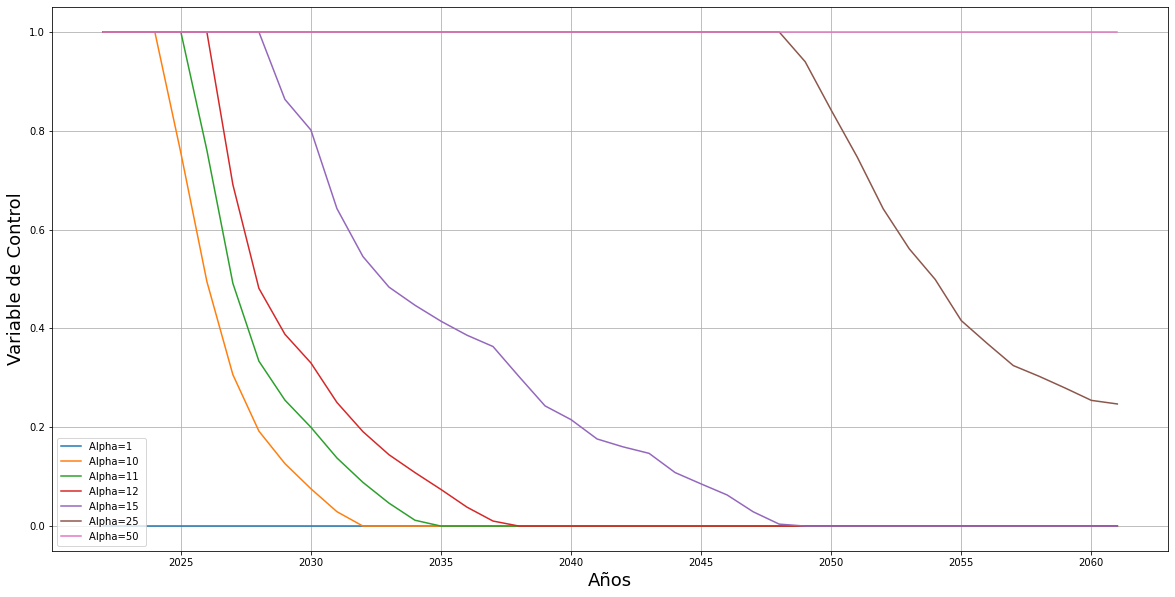

In [ ]:
lista=[1,10,11,12,15,25,50]
y_vec=[]
f_vec=[]
theta = 1
beta = 0.95
sueldo=1
plt.figure(figsize=(20,10))
for alpha in lista:
  rango=list(range(periodos))
  rango.reverse()
  P=np.zeros(periodos+1)
  P[periodos]=theta
  for i in rango:
      P[i]=1+beta*P[i+1]*Lambda
  F=np.ones(periodos+1)
  for i in range(periodos):
    #F[i]=c*np.exp(i*fondo_e_mean)+c
    #F[i]=c*np.exp(i*fondo_a_mean)+c
    F[i]=sueldo*c*np.exp(i*((1/2)*(fondo_a_mean+fondo_e_mean)+(1/8)*(covarianza[1][1]+2*covarianza[1][0]*np.sqrt(covarianza[1][1])*np.sqrt(covarianza[0][0])+covarianza[1][1])))+sueldo*c
    #F[i]=1*np.exp(i*((1/2)*(fondo_a_mean+fondo_e_mean)+(1/8)*(covarianza[1][1]+2*covarianza[1][0]*np.sqrt(covarianza[1][1])*np.sqrt(covarianza[0][0])+covarianza[1][1])))+c
  Q=np.zeros(periodos+1)
  Q[periodos]=theta*(F[len(F)-1]+(1/2)*alpha)
  for i in rango:
      Q[i]=F[i]+0.5*alpha+beta*(Q[i+1]*Gamma-sueldo*c*P[i+1]*Lambda)
  R=np.ones(periodos+1)
  R[periodos]=theta*(F[len(F)-1]**2+alpha*F[len(F)-1])
  for i in rango:
      R[i]=F[i]+alpha*F[i]+beta*((sueldo*c)**(2)*P[i+1]*Lambda-2*sueldo*c*Q[i+1]*np.exp(fondo_e.mean()+(1/2)*covarianza[1][1])+((Q[i+1]**2)/(P[i+1]))*Omega+R[i+1])
  y_solucion=np.zeros(periodos)
  f=np.zeros(periodos+1)
  f[0]=c
  for i in range(periodos):
    y_solucion[i]=(Q[i+1]*(esperanza_log_normal_W_1-esperanza_log_normal_W_2))/(P[i+1]*(f[i]+sueldo*c)*esperanza_W_1_W_2_2)-(esperanza_W_1W_2-esperanza_log_normal_W_22)/(esperanza_W_1_W_2_2)
    if y_solucion[i]>1:
      y_solucion[i]=1
    elif y_solucion[i]<0:
      y_solucion[i]=0
    else:
      pass
    f[i+1]=(f[i]+sueldo*c)*(y_solucion[i]*np.exp(lambda_[i])+(1-y_solucion[i])*np.exp(mu_[i]))
  f_vec.append(f)
  y_vec.append(y_solucion)
  plt.plot([2022+i for i in range(40)],y_solucion,label='Alpha=%s ' % alpha)
plt.legend(loc='lower left')
plt.grid()
plt.xlabel("Años",fontsize=18)
plt.ylabel("Variable de Control",fontsize=18)
plt.show()

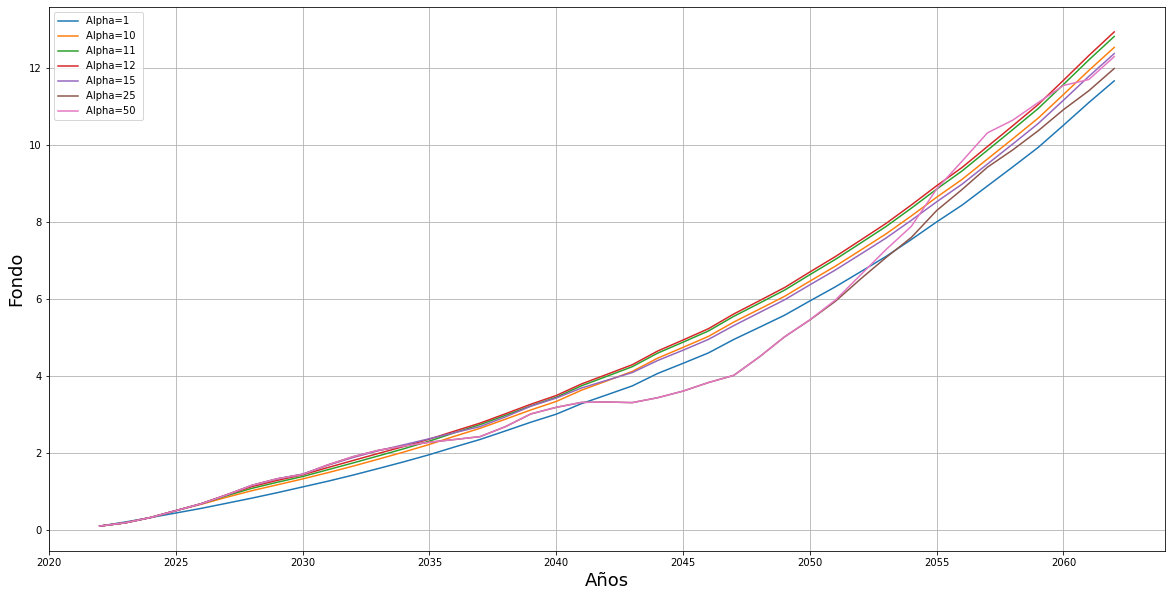

In [ ]:
j=0
plt.figure(figsize=(20,10))
plt.grid()
for alpha in lista:
  plt.plot([2022+i for i in range(41)],f_vec[j],label='Alpha=%s ' % alpha)
  j+=1
plt.legend(loc='upper left')
plt.xlabel("Años",fontsize=18)
plt.ylabel("Fondo",fontsize=18)
plt.show()

In [ ]:
f_vec[0][40]

11.666318627616521

Tasa de reemplazo

In [ ]:
meses=12
años_jubilacion=18
df=pd.DataFrame({'Alpha':lista,'RR':[(f_vec[i][40]/(años_jubilacion)) for i in range(len(lista))]})
df

,Alpha,RR
0,1,0.648129
1,10,0.696377
2,11,0.712207
3,12,0.718792
4,15,0.687458
5,25,0.665961
6,50,0.683065


VaR

In [ ]:
from scipy.stats import norm
cont=0
var_list=[]
for gamma in lista:
  weights=np.array([y_vec[cont].mean(),1-y_vec[cont].mean()])
  avg_rets=pd.DataFrame({'Fondo A':np.exp(fondo_a.mean()),'Fondo E':np.exp(fondo_e.mean())},index=[0])
  port_mean = avg_rets.dot(weights)

  # Calculate portfolio standard deviation
  port_stdev = np.sqrt(weights.T.dot(covarianza).dot(weights))
  initial_investment=f_vec[cont][0]
  mean_investment = (1+port_mean) * initial_investment

  # Calculate standard deviation of investmnet
  stdev_investment = initial_investment * port_stdev
  # Select our confidence interval (I'll choose 95% here)
  conf_level1 = 0.05

  # Using SciPy ppf method to generate values for the
  # inverse cumulative distribution function to a normal distribution
  # Plugging in the mean, standard deviation of our portfolio
  # as calculated above
  # https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
  cutoff1 = norm.ppf(1-conf_level1, mean_investment, stdev_investment)
  #Finally, we can calculate the VaR at our confidence interval
  var_1d1 = cutoff1
  var_list.append(var_1d1)
  cont+=1
var_list

[array([0.20873458]),
 array([0.20864801]),
 array([0.20873773]),
 array([0.20887993]),
 array([0.2099452]),
 array([0.21631123]),
 array([0.21870438])]

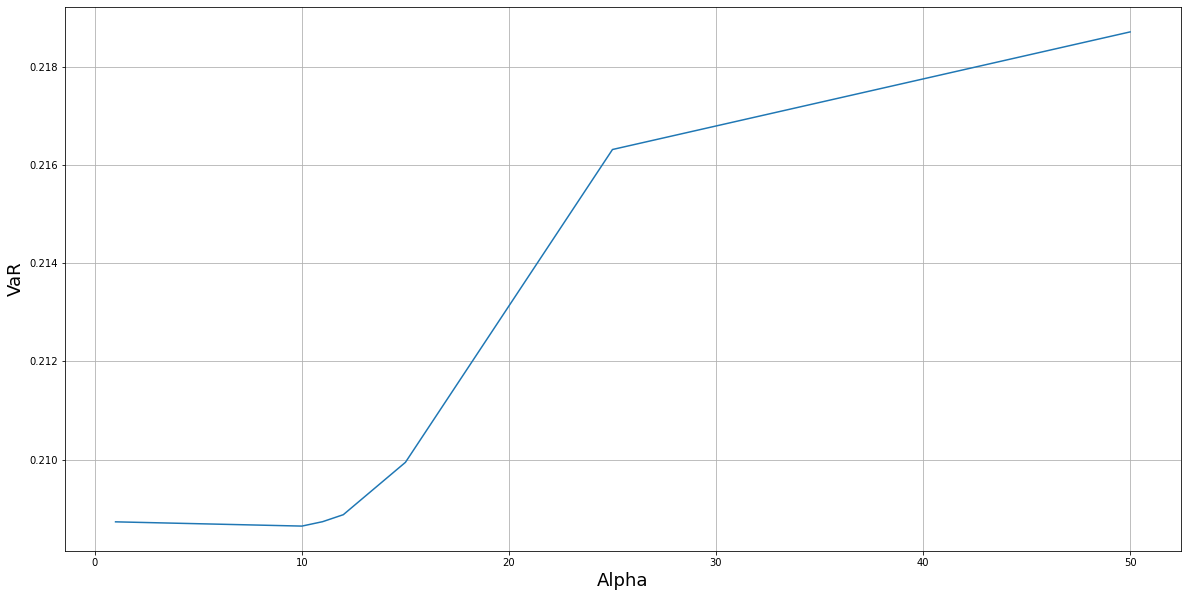

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(lista,var_list)
plt.grid()
plt.xlabel("Alpha",fontsize=18)
plt.ylabel("VaR",fontsize=18)
plt.show()

In [ ]:
años_jubilacion=18
df=pd.DataFrame({'Gamma':lista,'VaR':[x[0] for x in var_list]})
df

,Gamma,VaR
0,1,0.208735
1,10,0.208648
2,11,0.208738
3,12,0.208880
4,15,0.209945
5,25,0.216311
6,50,0.218704


CVaR

In [ ]:
cvar_list=[]
cont=0
for gamma in lista:
  CVaR = (1/(1-0.95))*norm.expect(lambda x: var_list[cont], lb = 0,ub=1-0.95)
  cvar_list.append(CVaR)
  cont+=1

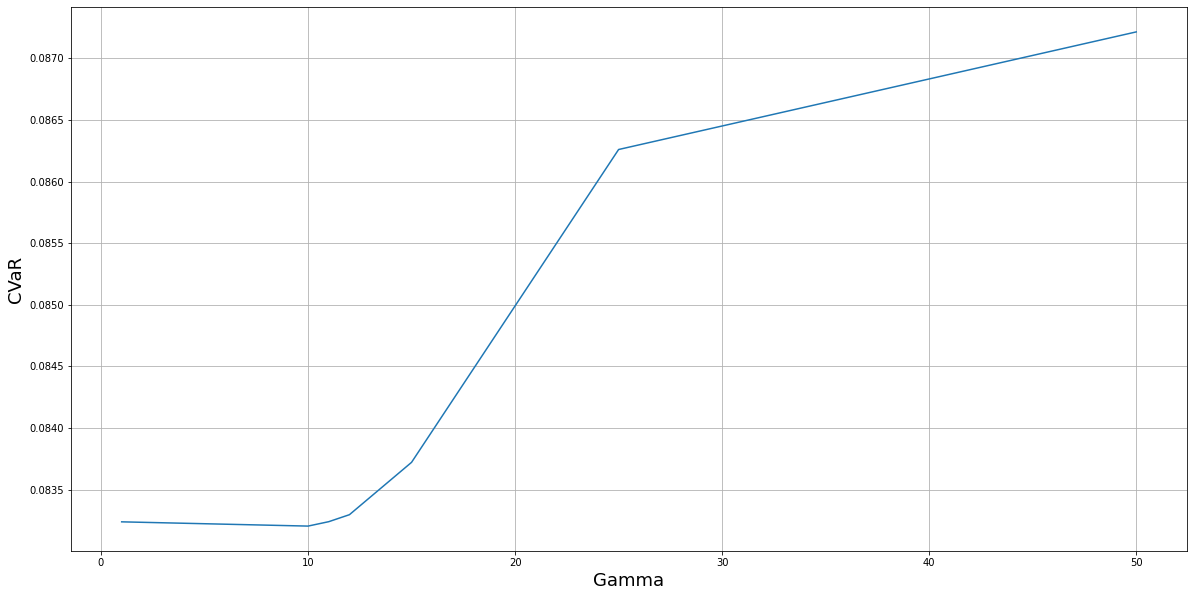

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(lista,cvar_list)
plt.grid()
plt.xlabel("Gamma",fontsize=18)
plt.ylabel("CVaR",fontsize=18)
plt.show()

In [ ]:
df=pd.DataFrame({'Gamma':lista,'CVaR':cvar_list})
df

,Gamma,CVaR
0,1,0.083238
1,10,0.083204
2,11,0.083240
3,12,0.083296
4,15,0.083721
5,25,0.086260
6,50,0.087214


<Figure size 1440x720 with 0 Axes>

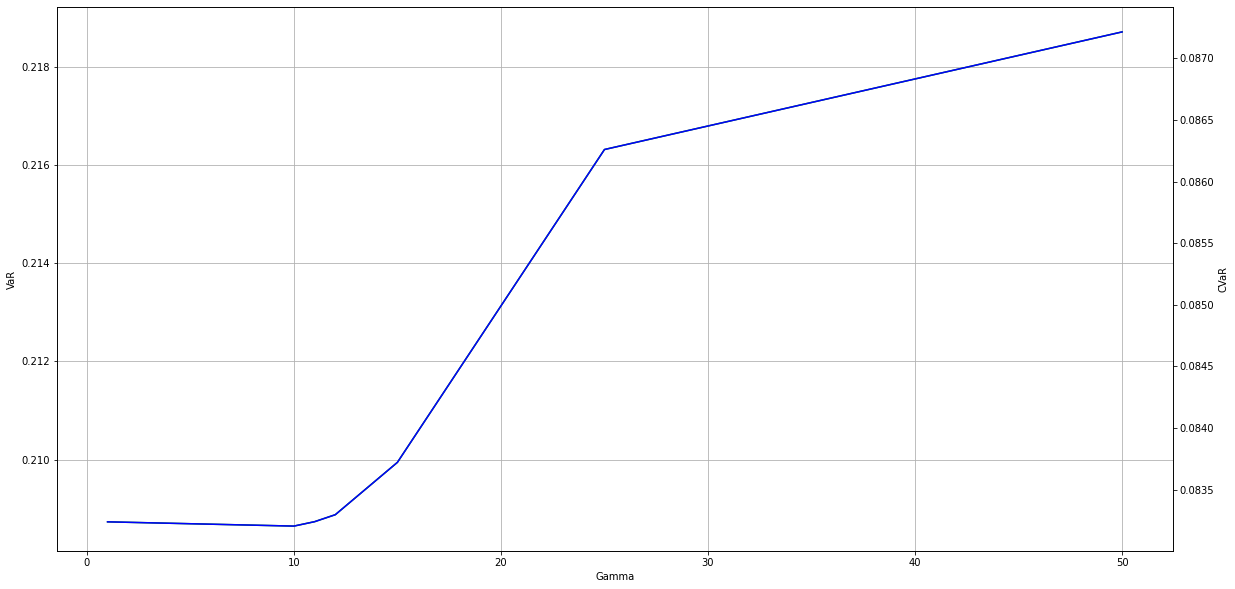

In [ ]:
plt.figure(figsize=(20,10))
fig, ax1 = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(20)
ax1.grid()
ax2 = ax1.twinx()
ax1.plot(lista, var_list, 'g-')
ax2.plot(lista, cvar_list, 'b-')
ax1.set_ylabel('VaR')
ax2.set_ylabel('CVaR')
ax1.set_xlabel('Gamma')
#plt.grid()
#plt.xlabel("Gamma",fontsize=18)
#plt.ylabel("VaR",fontsize=18)
plt.show()

Laguna de 6 meses cada 5 años


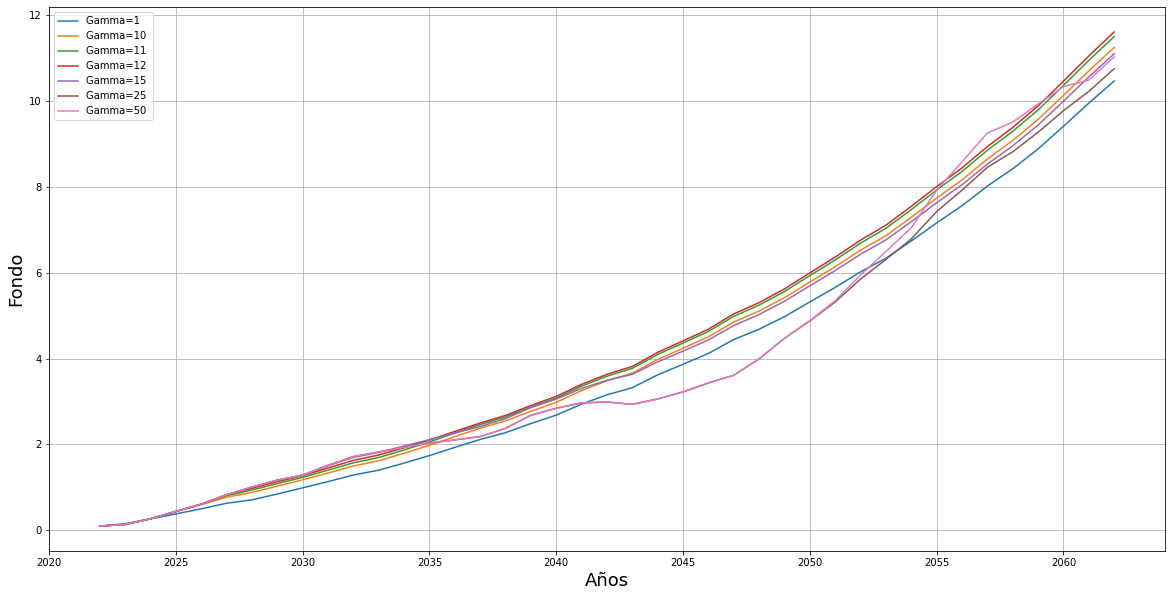

In [ ]:
f=np.zeros(41)
c=0.1
meses=12
f[0]=c
plt.figure(figsize=(20,10))
f_vec=[]
f_vec_array=np.array([])
j=0
for gamma in lista:
  for i in range(40):
      if i%5==0:
        lambda_A_t=lambda_[i]
        mu_E_t=mu_[i]
        f[i+1]=(f[i]+c/2)*(y_vec[j][i]*np.exp(lambda_A_t)+(1-y_vec[j][i])*np.exp(mu_E_t))

      else:
        lambda_A_t=lambda_[i]
        mu_E_t=mu_[i]
        f[i+1]=(f[i]+c)*(y_vec[j][i]*np.exp(lambda_A_t)+(1-y_vec[j][i])*np.exp(mu_E_t))
  f_vec.append(f)
  f_vec_array=np.append(f_vec_array,f)
  plt.plot([2022+i for i in range(41)],f_vec[j],label='Gamma=%s ' % gamma)
  j+=1
plt.legend(loc='upper left')
plt.grid()
plt.xlabel("Años",fontsize=18)
plt.ylabel("Fondo",fontsize=18)
plt.show()

In [ ]:
lista_f_vec=[]
for i in range(len(lista)):
  lista_f_vec.append(f_vec_array[41*i:41*(i+1)])

Tasa de reemplazo


In [ ]:
años_jubilacion=18
df=pd.DataFrame({'Gamma':lista,'RR':[(lista_f_vec[i][40]/(años_jubilacion)) for i in range(len(lista))]})
df

,Gamma,RR
0,1,0.581154
1,10,0.624563
2,11,0.638736
3,12,0.644615
4,15,0.616426
5,25,0.597108
6,50,0.612418


#Escenarios

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
años_jubilacion=18
lista_RR=[]
f_vec=[]
y_vec=[]
for j in range(100):
  print(j)
  periodos=40
  sueldo=1
  fondo_a=pd.read_csv('/content/drive/My Drive/Escenarios Fondo A/df_escenario_'+str(j)+'.csv')[['Fondo Tipo A']]
  fondo_e=pd.read_csv('/content/drive/My Drive/Escenarios Fondo E/df_escenario_'+str(j)+'.csv')[['Fondo Tipo A']]
  fondo_e.columns=['Fondo Tipo E']
  fondo_a_historico=pd.read_csv("/content/drive/My Drive/Agrupacion_historica_Fondo_A.csv")[['Fondo Tipo A']]
  fondo_e_historico=pd.read_csv("/content/drive/My Drive/Agrupacion_historica_Fondo_E.csv")[['Fondo Tipo E']]
  theta = 1
  alpha = 12
  beta = 0.95
  lambda_= fondo_a.values
  mu_= fondo_e.values
  c = 0.1
  fondo_a_new=pd.DataFrame(fondo_a,columns=['Fondo Tipo A'])
  fondo_e_new=pd.DataFrame(fondo_e,columns=['Fondo Tipo E'])
  fondo_a_historico=pd.concat([fondo_a_historico,fondo_a_new],axis=0)
  fondo_e_historico=pd.concat([fondo_e_historico,fondo_e_new],axis=0)
  fondo_a_historico=fondo_a_historico.reset_index().drop(columns=['index'])
  fondo_e_historico=fondo_e_historico.reset_index().drop(columns=['index'])
  fondo_a=fondo_a_historico['Fondo Tipo A']
  fondo_e=fondo_e_historico['Fondo Tipo E']
  offset=19
  lambda_= fondo_a.loc[offset:].values
  mu_= fondo_e.loc[offset:].values
  fondo_a_mean = float(fondo_a.loc[offset:].mean())
  fondo_e_mean = float(fondo_e.loc[offset:].mean())
  covarianza = np.cov(np.stack((fondo_a.values,fondo_e.values),axis=0))
  esperanza_log_normal_W_1 = np.exp(fondo_a_mean+(1/2)*covarianza[0][0])
  esperanza_log_normal_W_2 = np.exp(fondo_e_mean+(1/2)*covarianza[1][1])
  esperanza_log_normal_W_12 = np.exp(2*(fondo_a_mean+covarianza[0][0]))
  esperanza_log_normal_W_22 = np.exp(2*(fondo_e_mean+covarianza[1][1]))
  esperanza_W_1W_2 = np.exp((fondo_a_mean+fondo_e_mean)+(1/2)*(covarianza[0][0]+covarianza[1][1]+2*covarianza[1][0]*np.sqrt(covarianza[1][1])*np.sqrt(covarianza[0][0])))
  esperanza_W_1_W_2_2=esperanza_log_normal_W_12-2*esperanza_W_1W_2+esperanza_log_normal_W_22
  Lambda=(esperanza_log_normal_W_12*esperanza_log_normal_W_22-(esperanza_W_1W_2)**2)/(esperanza_W_1_W_2_2)
  Gamma=(esperanza_log_normal_W_12*esperanza_log_normal_W_2+esperanza_log_normal_W_1*esperanza_log_normal_W_22-esperanza_W_1W_2*(esperanza_log_normal_W_1+esperanza_log_normal_W_2))/(esperanza_W_1_W_2_2)
  Omega=((esperanza_log_normal_W_1-esperanza_log_normal_W_2)**2)/(esperanza_W_1_W_2_2)
  rango=list(range(periodos))
  rango.reverse()
  P=np.zeros(periodos+1)
  P[periodos]=theta
  for i in rango:
      P[i]=1+beta*P[i+1]*Lambda
  F=np.ones(periodos+1)
  for i in range(periodos):
    #F[i]=c*np.exp(i*fondo_e_mean)+c
    #F[i]=c*np.exp(i*fondo_a_mean)+c
    F[i]=sueldo*c*np.exp(i*((1/2)*(fondo_a_mean+fondo_e_mean)+(1/8)*(covarianza[1][1]+2*covarianza[1][0]*np.sqrt(covarianza[1][1])*np.sqrt(covarianza[0][0])+covarianza[1][1])))+sueldo*c
    #F[i]=1*np.exp(i*((1/2)*(fondo_a_mean+fondo_e_mean)+(1/8)*(covarianza[1][1]+2*covarianza[1][0]*np.sqrt(covarianza[1][1])*np.sqrt(covarianza[0][0])+covarianza[1][1])))+c
  Q=np.zeros(periodos+1)
  Q[periodos]=theta*(F[len(F)-1]+(1/2)*alpha)
  for i in rango:
      Q[i]=F[i]+0.5*alpha+beta*(Q[i+1]*Gamma-sueldo*c*P[i+1]*Lambda)
  R=np.ones(periodos+1)
  R[periodos]=theta*(F[len(F)-1]**2+alpha*F[len(F)-1])
  for i in rango:
      R[i]=F[i]+alpha*F[i]+beta*((sueldo*c)**(2)*P[i+1]*Lambda-2*sueldo*c*Q[i+1]*np.exp(fondo_e.mean()+(1/2)*covarianza[1][1])+((Q[i+1]**2)/(P[i+1]))*Omega+R[i+1])
  y_solucion=np.zeros(periodos)
  f=np.zeros(periodos+1)
  f[0]=c
  for i in range(periodos):
    y_solucion[i]=(Q[i+1]*(esperanza_log_normal_W_1-esperanza_log_normal_W_2))/(P[i+1]*(f[i]+sueldo*c)*esperanza_W_1_W_2_2)-(esperanza_W_1W_2-esperanza_log_normal_W_22)/(esperanza_W_1_W_2_2)
    if y_solucion[i]>1:
      y_solucion[i]=1
    elif y_solucion[i]<0:
      y_solucion[i]=0
    else:
      pass
    f[i+1]=(f[i]+sueldo*c)*(y_solucion[i]*np.exp(lambda_[i])+(1-y_solucion[i])*np.exp(mu_[i]))
  f_vec.append(f)
  y_vec.append(y_solucion)
  lista_RR.append(f_vec[j][40]/(años_jubilacion))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


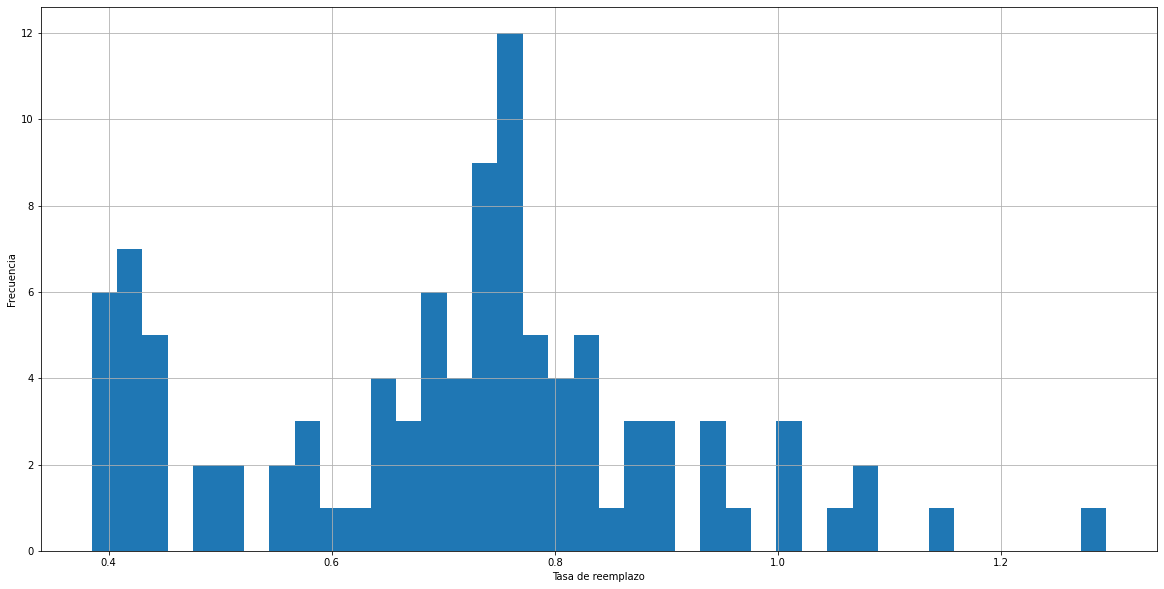

In [ ]:
plt.figure(figsize=(20,10))
plt.hist(lista_RR,bins=40)
plt.grid()
plt.ylabel('Frecuencia')
plt.xlabel('Tasa de reemplazo')
plt.show()

In [ ]:
np.median(lista_RR)

0.7375946260123671